#**<font color="#b28800">California Housing Prices🏘️**
[Dataset link](https://www.kaggle.com/datasets/camnugent/california-housing-prices/)



















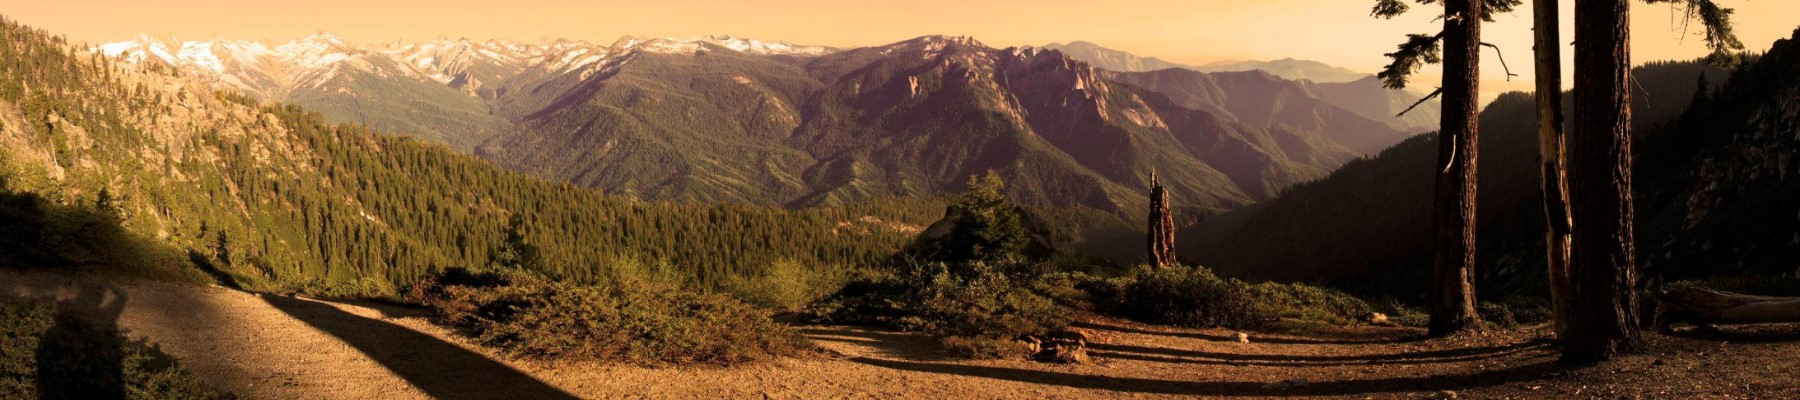

**<font color="#b28800">Dataset Overview:**
This dataset contains 20640 California census information about housing characteristics in various districts. The data requires preprocessing as it hasn't been cleaned.

**<font color="#b28800">Key Features:**

<font color="#b28800">
Geographic coordinates (longitude, latitude)

**<font color="#b28800">Property characteristics:**

<font color="#b28800">
Housing median age

<font color="#b28800">Total rooms

<font color="#b28800">Total bedrooms

<font color="#b28800">Demographic data:

<font color="#b28800">Population count

<font color="#b28800">Household count

<font color="#b28800">Median income

<font color="#b28800">Target variable:

<font color="#b28800">Median house value

<font color="#b28800">Categorical feature:

<font color="#b28800">Ocean proximity (coastal/non-coastal areas)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , root_mean_squared_error

In [ ]:
  df = pd.read_csv('/content/housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **<font color ="#b28800">EDA**

In [ ]:
df.shape

(20640, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


# **<font color ="#b28800">Splitting data to avoid data snooping**

In [ ]:
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

# **<font color ="#b28800">Handling Missing Values**

In [ ]:
train.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
BedRoomsMdeian = train['total_bedrooms'].median()

In [ ]:
# Fill missing values if needed (focusing on total_bedrooms which commonly has NaN)
if train['total_bedrooms'].isnull().sum() > 0:
    train['total_bedrooms'] = train['total_bedrooms'].fillna(train['total_bedrooms'].median())
    test['total_bedrooms'] = test['total_bedrooms'].fillna(BedRoomsMdeian)
    print(f"Filling {test['total_bedrooms'].isnull().sum()} missing values in test total_bedrooms")
    print(f"Filling {train['total_bedrooms'].isnull().sum()} missing values in train total_bedrooms")

Filling 0 missing values in test total_bedrooms
Filling 0 missing values in train total_bedrooms


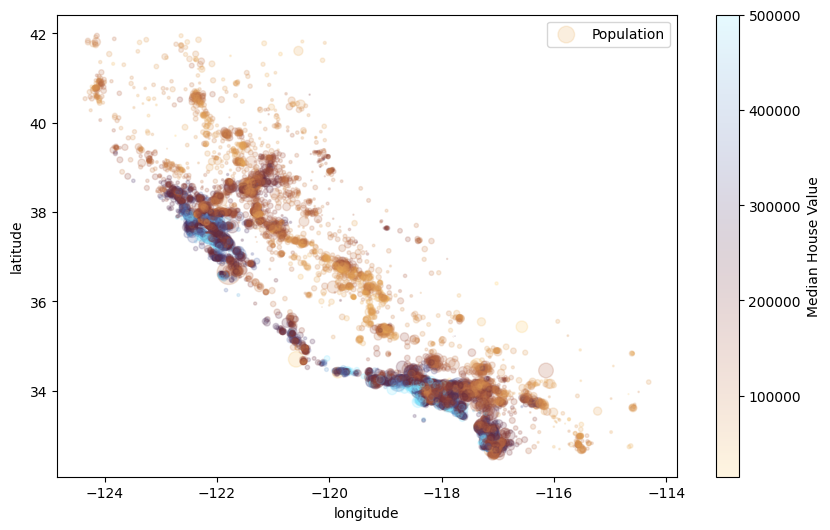

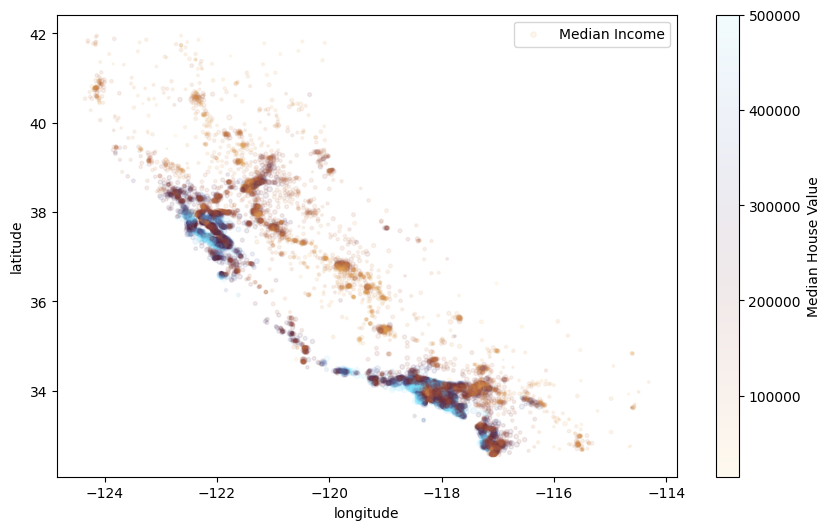

In [ ]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
             s=train["population"] / 100, label="Population", figsize=(10, 6),
             c="median_house_value", cmap=plt.get_cmap("managua"));
p = plt.gcf()
p.get_axes()[1].set_ylabel("Median House Value")

train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
             s=train["median_income"] * 2, label="Median Income", figsize=(10, 6),
             c="median_house_value", cmap=plt.get_cmap("managua"));
p = plt.gcf()
p.get_axes()[1].set_ylabel("Median House Value");

# **<font color ="#b28800">Handling Outliers**


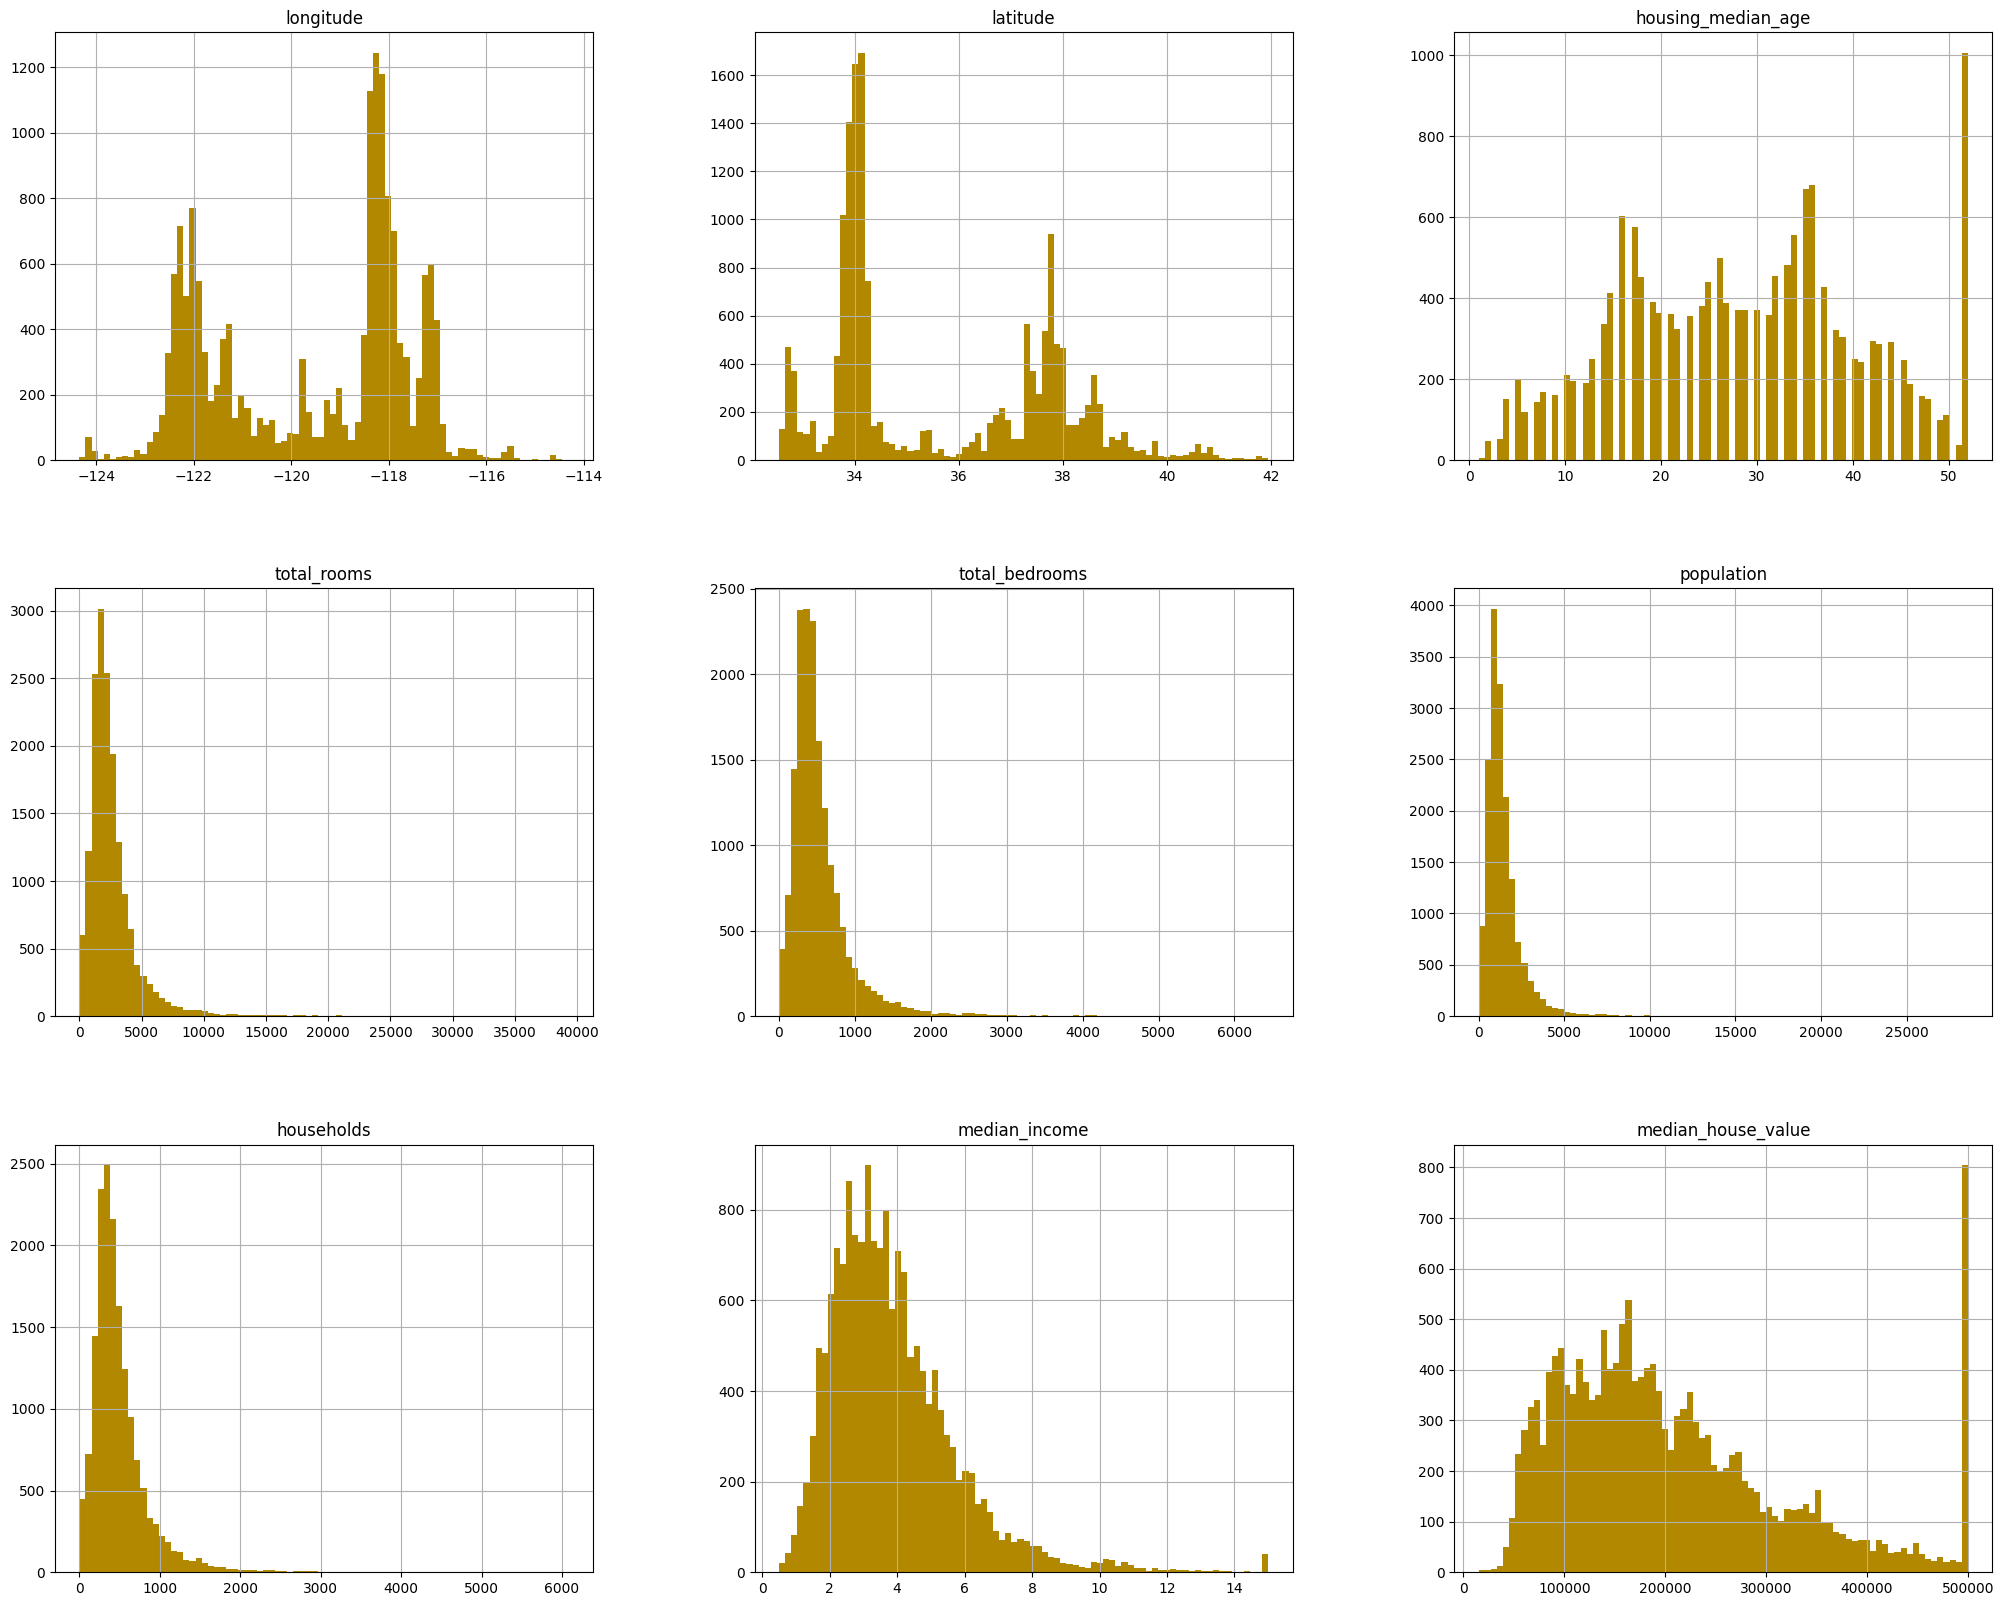

In [ ]:
train.hist(bins=80, figsize=(25, 20), color="#b28800", ec="black");



<font color ="#b28800">Observations:
`median_house_age` and `median_house_value` have outliers at the highest values; it could be because values higher than the highest value are replaced with the highest.


<font color ="#b28800">
Thought: Median income is probably an important feature for predicting the median house value.

In [ ]:
perc = {}
for i in train.columns:
    # Only calculate for numerical columns
    if np.issubdtype(train[i].dtype, np.number):
        q1 = train[i].quantile(0.25)
        q3 = train[i].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        outliers = train[(train[i] < lower_bound) | (train[i] > upper_bound)]
        perc[i] = round(100 * len(outliers) / len(train), 2)

print(perc)

{'longitude': 0.0, 'latitude': 0.0, 'housing_median_age': 0.0, 'total_rooms': 6.09, 'total_bedrooms': 6.27, 'population': 5.84, 'households': 5.97, 'median_income': 3.34, 'median_house_value': 5.08}





> out<1%: Typically safe to ignore

> out1-5%: Investigate before deciding



> out>5%: Requires robust methods or data revision

**Reference:** Hair et al., Multivariate Data Analysis (8th Ed.), Chapter 3





<font color ="#b28800">Fill with median

In [ ]:
medians = {}
for i in train.columns:
    # Only calculate for numerical columns
    if np.issubdtype(train[i].dtype, np.number) and i != 'median_house_value': # Changed line
        q1 = train[i].quantile(0.25)
        q3 = train[i].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        outliers = train[(train[i] < lower_bound) | (train[i] > upper_bound)]
        mdi = train[i].median()
        train.loc[outliers.index, i] = mdi
        medians[i] = mdi
        print(f"Filling {len(outliers)} outliers in {i} with median {mdi}")

Filling 0 outliers in longitude with median -118.49
Filling 0 outliers in latitude with median 34.254999999999995
Filling 0 outliers in housing_median_age with median 29.0
Filling 1006 outliers in total_rooms with median 2123.0
Filling 1036 outliers in total_bedrooms with median 433.0
Filling 964 outliers in population with median 1165.0
Filling 986 outliers in households with median 409.0
Filling 552 outliers in median_income with median 3.53485


# **<font color="#b28800">Encoding**

In [ ]:
train['ocean_proximity'] = le.fit_transform(train['ocean_proximity'])
test['ocean_proximity'] = le.transform(test['ocean_proximity'])

# **<font color="#b28800">Scalling**

In [ ]:
train_scaled = pd.DataFrame(sc.fit_transform(train.drop(['median_house_value'],axis=1)), columns=train.columns.drop('median_house_value'))
test_scaled = pd.DataFrame(sc.transform(test.drop(['median_house_value'],axis=1)), columns=test.columns.drop('median_house_value'))

In [ ]:
train_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,5.518196e-15,7.112097e-16,1.871888e-17,-1.385627e-16,-1.430811e-17,-1.480835e-16,1.069343e-16,7.423003e-18,2.598051e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.391881e+00,-1.446426e+00,-2.196807e+00,-1.975661e+00,-2.015759e+00,-1.964004e+00,-2.003630e+00,-2.164339e+00,-8.254330e-01
25%,-1.112179e+00,-7.947334e-01,-8.465243e-01,-6.902178e-01,-6.939412e-01,-6.992184e-01,-6.878701e-01,-7.446356e-01,-8.254330e-01
50%,5.374377e-01,-6.423593e-01,2.718806e-02,-8.624667e-02,-9.311473e-02,-9.024774e-02,-8.637976e-02,-7.958041e-02,-1.246489e-01
75%,7.773818e-01,9.774942e-01,6.626152e-01,5.337591e-01,5.266266e-01,5.397219e-01,5.350819e-01,6.121107e-01,-1.246489e-01
max,2.626952e+00,2.965390e+00,1.854041e+00,3.094846e+00,3.120194e+00,3.072523e+00,3.085542e+00,2.992818e+00,1.977703e+00


# **<font color="#b28800">CorrMatrix**

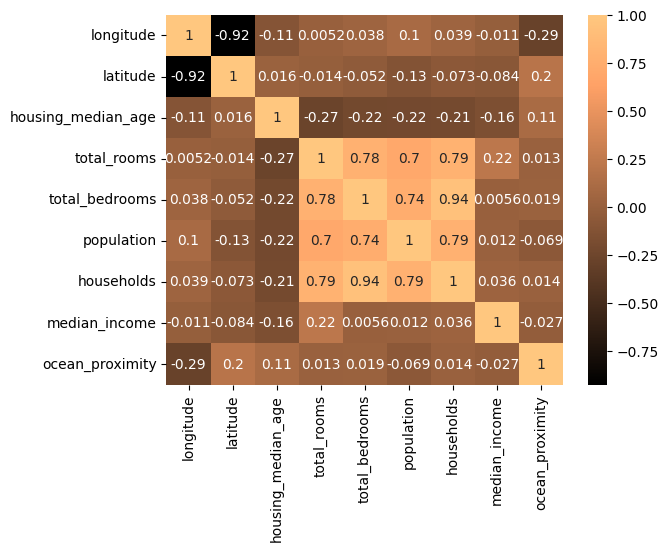

In [ ]:
sns.heatmap(train_scaled.corr(), annot=True, cmap='copper');

**<font color="#b28800">1. Multicollinearity:**
The correlation heatmap shows high correlation between several features, particularly:
<font color="#b28800">
- <font color="#b28800">total_bedrooms vs households (0.94)
- total_rooms vs total_bedrooms (0.78)
- total_rooms vs households (0.79)


<font color="#b28800">This suggests the presence of multicollinearity, which may affect the regression model's stability

In [ ]:
#avg_rooms_per_household = total_rooms / households
train_scaled['avg_rooms_per_household'] = train_scaled['total_rooms'] / train_scaled['households']
test_scaled['avg_rooms_per_household'] = test_scaled['total_rooms'] / test_scaled['households']


In [ ]:
train_scaled.drop(['total_rooms', 'households'], axis=1, inplace=True)
test_scaled.drop(['total_rooms', 'households'], axis=1, inplace=True)

# **<font color="#b28800">Modelling**

In [ ]:
X_train = train_scaled
y_train = train['median_house_value']
X_test = test_scaled
y_test = test['median_house_value']

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train )

LinearRegression()

In [ ]:
b0 = lr.intercept_
b1 = lr.coef_


In [ ]:
print(f"Intercept (b0): {b0}")
print(f"Coefficients (b1): {b1}")

Intercept (b0): 206900.20024823476
Coefficients (b1): [-1.00617636e+05 -1.07294251e+05  1.22626927e+04  2.43003368e+04
 -2.31353173e+04  5.63375985e+04 -2.82552783e+01 -2.34711006e+02]


In [ ]:
y_pred = lr.predict(X_test)

# **<font color="#b28800">Evalution**

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.5980606543331675


In [ ]:
y = train['median_house_value']

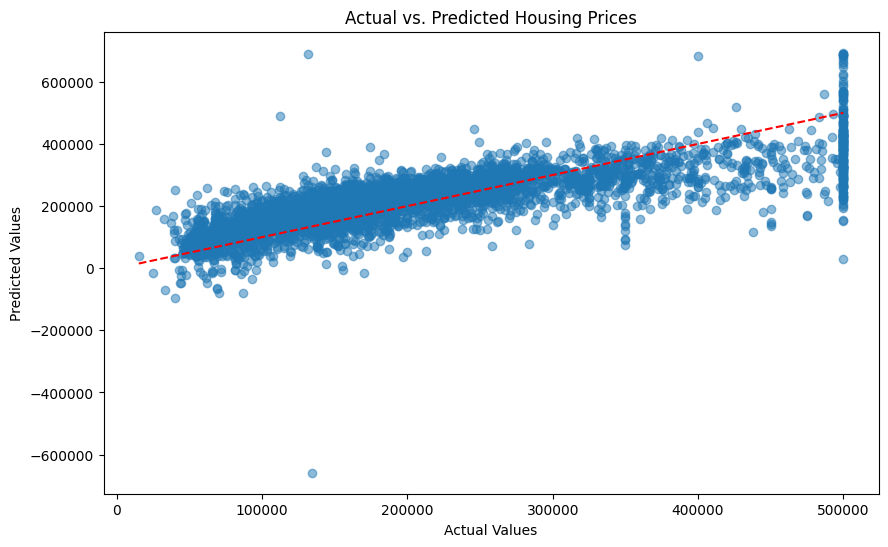

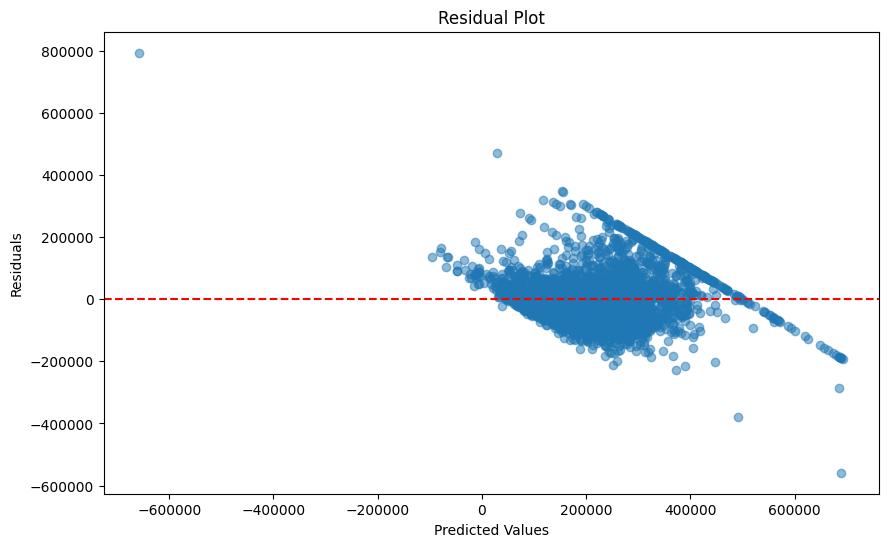

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Housing Prices')
plt.show()

# Plot residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()